<a name="0."></a>
# Описание проекта
Имеются данные о работе интернет-магазина по продаже компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные включают в себя игры до 2016. Дата на момент исследования - декабрь 2016 года и необходимо продумать кампанию на 2017 год.


<font size="2">([к содержанию](#0.0))</font>

## Общая информация о файле и его структура

Импортируем необходимые библиотеки:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Прочитаем файл games.csv и сохраним его в переменной data_games:

In [4]:
data_games = pd.read_csv('/datasets/games.csv')

Создадим функцию, которая загружает датафрейм и выводит основные данные по нему:


In [5]:
def load_data_games(name_of_data_games, separator=",", ind=None):
    data_games = pd.read_csv(name_of_data_games, sep=separator, index_col=ind)
    print("Первые 5 строк таблицы:", end="\n\n")
    display(data_games.head())
    print(
        "\n\n\n\nОсновные описательные статистики по признакам:", end="\n\n"
    )
    display(data_games.describe())
    print("\n\n\n\nОбщая информацию о таблице:", end="\n\n")
    display(data_games.info())
    print(f"\n\n\n\nПропущенные значения по признакам:", end="\n\n")
    display(pd.DataFrame(data_games.isnull().sum(), columns=["missing_values"]))
    print(f"\n\n\n\nКорреляция признаков:", end="\n\n")
    display(data_games.corr())
    return data_games

In [6]:
games_data_games = load_data_games("/datasets/games.csv")

Первые 5 строк таблицы:



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN






Основные описательные статистики по признакам:



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000






Общая информацию о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None





Пропущенные значения по признакам:



,missing_values
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701






Корреляция признаков:



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [7]:
data_games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

### Вывод:

**Первоначальный анализ данных показывает:**

- Больше всего пропусков в столбцах Critic_Score, User_Score и Rating. Эти столбцы связаны с рейтингом. Вероятно, рейтинги для новых игр еще не были сформированы, а для старых их некому было формировать. Также, возможно, причиной стали технические неполадки при хранении, обработке или выгрузки данных;

- Столбцы с количеством проданных копий содержат огромное количество нулевых значений (о чем свидетельствует равенство 25% и 50% квартиля нулю);

- Необходимо привести названия столбцов к единому регистру;

- Также необходимо изменить формат дат.




## Подготовка данных

Приведем названия столбцов к нижнему регистру:

In [8]:
data_games.columns = data_games.columns.str.lower()

In [9]:
for column in data_games[['name','platform','genre','rating']]:
    data_games[column] = data_games[column].str.lower()

In [10]:
data_games.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

С одной стороны, пропуски в столбцах name, year_of_release, Genre занимают небольшую часть от всех данных, поэтому с ними можно ничего не делать, но с другой, оставлять пропуски - плохая идея.

Поэтому все же сделаем некоторые преобразования. Начнем с формата дат.



Так как у нас не получится адекватно заполнить пропуски по релизу, то вставим для себя число-метку, которое будет означать отсутствие даты релиза, например, 1900:

In [11]:
data_games['year_of_release'] = data_games['year_of_release'].fillna(1900)
data_games['year_of_release'] = data_games['year_of_release'].astype('int')

In [12]:
data_games['year_of_release'] = data_games['year_of_release'].astype('str')

In [13]:
data_games['sample_date'] = '-01-01'

In [14]:
data_games['year_of_release'] = data_games['year_of_release'] + data_games['sample_date']

In [15]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sample_date
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8,e,-01-01
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,-01-01
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,-01-01
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8,e,-01-01
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,-01-01


In [16]:
data_games['year_of_release'] = pd.to_datetime(data_games['year_of_release'], format='%Y-%m-%d').dt.year

Сделаем проверку:

In [17]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sample_date
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e,-01-01
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,-01-01
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,-01-01
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e,-01-01
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,-01-01


In [18]:
data_games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1900, 1995,
       1991, 1981, 1987, 1980, 1983])

Теперь перейдем к оценкам, рейтингу, жанру и имени:


- Причины отсутствия рейтинга неизвестны. Даже если на одной игровой платформе игра вышла очень популярной, то необязательно, что она будет популярна и на другой. Пропуски в столбцах critic_score, user_score и rating можно заполнить, но тогда в противном случае смешаются пропуски и реальные значения; Остается эти пропуски не заполнять совсем.



- Игры на разных платформах могут отличаться не только рейтингом, но и контентом, поэтому поставим всем общую группу "Вне рейтинга";


- В жанрах и именах просто укажем на их отсутствие.



In [19]:
data_games['rating'] = data_games['rating'].fillna('out of rating')
data_games['genre'] = data_games['genre'].fillna('no genre game')
data_games['name'] = data_games['name'].fillna('no name game')

Также обратим внимание на на аббревиатуру 'tbd' в столбце оценок пользователей:

In [20]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Проверим какое количество значений с этой аббревиатурой:

In [21]:
data_games[data_games['user_score'] == 'tbd']['user_score'].count()

2424

"tbd" расшифровывается как to be determined, что в переводе означает "будет определено". Вероятнее всего, играм с такой меткой ни один пользователь не поставил оценку, или же задан алгоритм, что средняя оценка отображается лишь в том случае, если общее число оценок не меньше, например, 5 шт. В данном случае можно заменить на NaN.

In [22]:
data_games.loc[data_games['user_score'] == 'tbd','user_score'] = np.nan

При первичном осмотре данных мы не заметили, что столбец 'user_score' имеет значения с плавающей точкой. Сейчас здесь стоит тип object. Исправим на float и сделаем проверку:

In [23]:
data_games['user_score'] = data_games['user_score'].astype('float')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
sample_date        16715 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Проверим наличие дубликатов:

In [24]:
data_games.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [25]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sample_date,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,-01-01,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,out of rating,-01-01,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,-01-01,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,-01-01,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,out of rating,-01-01,31.38


### Вывод:

Большая часть пропусков сосредоточена в столбцах critic_score, user_score и rating. Причины могут быть различны, но выделим наиболее вероятные:

- Для старых игр очень часто отсутствуют отзывы и оценки. Возможно, сайт начал работу  в более поздний период, чем начали появляться игры и, как следствие, отзывы не успевали для старых игр, которые к моменту появления сайта уже исчезли из продаж;

- Игровая индустрия выпускает всё больше игр с привязкой к отдельным консолям, и, как следствие, игр, у которых нет отзывов становится всё больше. Возможно, произошел переломный момент, на рынок пришли консоли нового поколения, объём ежегодно выпускаемых игр уменьшился, и, как следствие, появилось меньше пропусков в оценках игр;

- Также пропуски могут быть следствием технической неисправности на этапе сбора, обработки или же выгрузки данных.

## Исследовательский анализ данных

Посмотрим, как менялось количество выпускаемых игр:

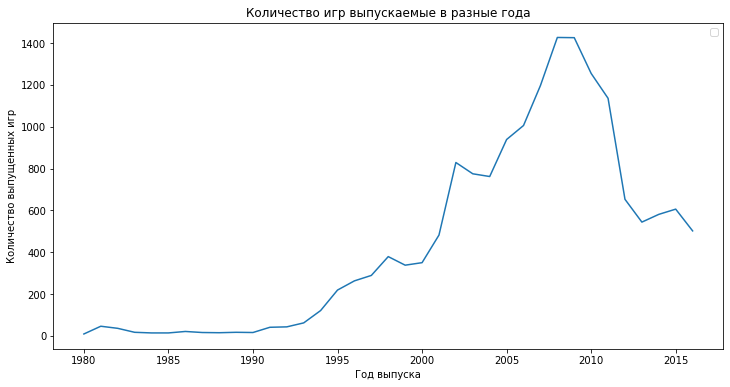

In [26]:
games_on_period = data_games.pivot_table(index= data_games[data_games['year_of_release'] != 1900]['year_of_release'], values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

Из графика следует, что до 2000-х годов выпускалось игр немного. Затем со временем игровых студий стало больше и число релизов росло. Тем не менее, мы видим, что после 2010 года наблюдается снижение числа релизов. Вероятно, к играм предъявляются все большие требования, и процесс их создания становится все более технически сложным, поэтому, возможно, разработчикам требуется больше времени. Либо начали рарабатываться мобильные игры и приложения и пошел спад на консоли.

**Посмотрим продажи по платформам:**

Text(0, 0.5, 'Количество продаж')

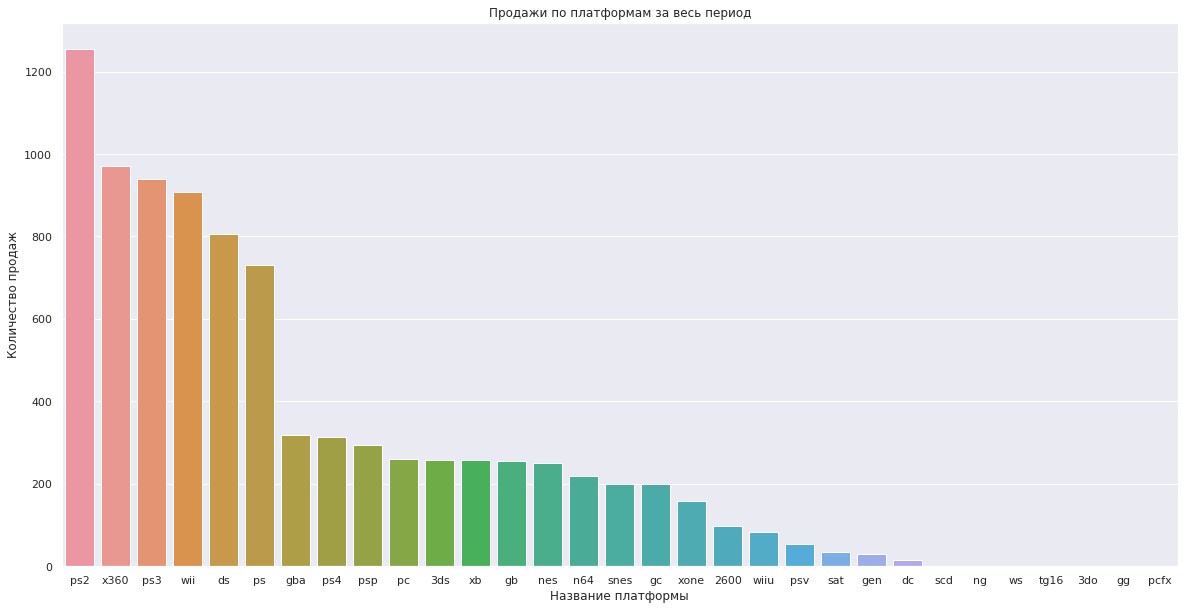

In [62]:
platform_on_sales = data_games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS<br><br>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Думаю, сейчас ps4 (на 2021) потеснила ps2
</div>

Создадим функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2005 года:

In [28]:
def year_total_sale_for_platform(name, data):
    return data[(data['platform']==name) & (data['year_of_release']>2005)].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

Сделаем таблицу по платформам и их общим продажам с сортировкой по убыванию. Оставим ТОП-5.

In [29]:
top_5_platforms = data_games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

**Посмотрим ТОП-5 продаваемых платформ:**

In [30]:
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


С помощью графика посмотрим поведение игровых платформ за последние 10 лет:

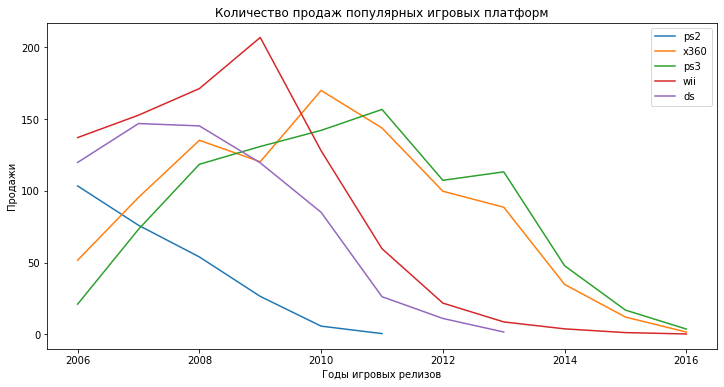

In [31]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,data_games)['total_sales'], label=i)
    plt.legend()

 - В среднем все игровые платформы существуют до 10 лет;
 
 - Пик продаж наступает через 5 лет после выхода приставки;
 
 - Самые продаваемые это PS и XBOX
    

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Сохраним в переменной df_top_5_platforms ТОП-5 платформ и избавимся от выбросов:

In [32]:
list_of_top5 = ['ps2','x360','ps3','wii','ds']
df_top_5_platforms = data_games[data_games['platform'].isin(['ps2','x360','ps3','wii','ds'])]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales']<1.4]

In [33]:
df_top_5_platforms['total_sales'].describe()

count    7469.000000
mean        0.280778
std         0.300902
min         0.000000
25%         0.060000
50%         0.160000
75%         0.400000
max         1.390000
Name: total_sales, dtype: float64

Посмотрим "Ящики с усами":

Text(0, 0.5, 'Глобальные продажи')

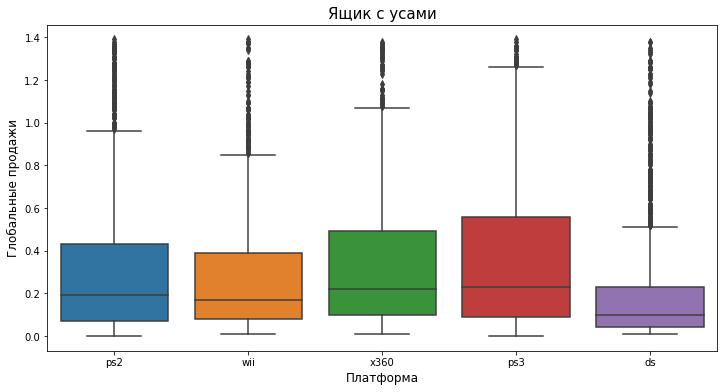

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

- У каждой платформы медианное значение располагается по-разному;
- Больше всех продаж у PS3, затем X360, после PS2, WII и DS на последнем месте.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 



Корреляция между оценками пользователей и продажами:

In [35]:
sony_play_station2 = data_games[data_games['platform']=='ps2']
sony_play_station2['user_score'].corr(sony_play_station2['total_sales'])

0.17286551112058213

Построим диаграмму рассеяния:

Text(0.5, 1.0, 'test')

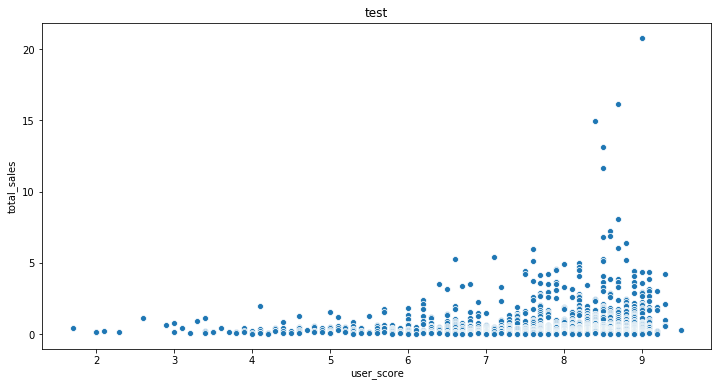

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station2)
plt.title('test')

Построим диаграмму рассеяния по оценкам критиков:

Text(0.5, 1.0, 'test')

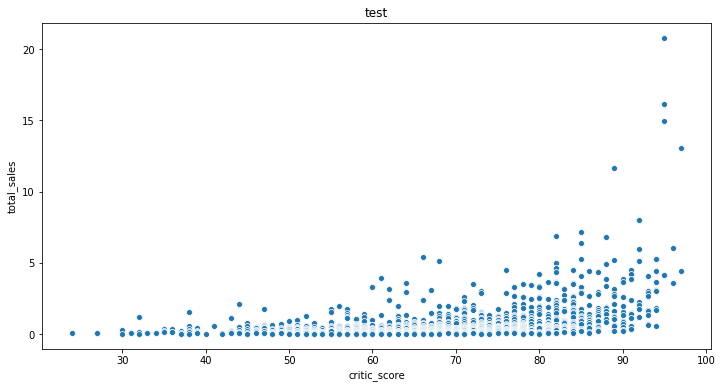

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station2)
plt.title('test')

Корреляция между оценкой критиков и продажам:

In [38]:
sony_play_station2['critic_score'].corr(sony_play_station2['total_sales'])

0.39543454945454876

### Сделаем соотношение выводов и продаж игр на других платформах.

Сделаем функцию, которая будет отображать графики рассеяния и производить подсчет корреляции:

In [39]:
def other_platform_matrix(name_of_platform):
    platform = data_games[data_games['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

Выведем все 5 графиков с помощью цикла:

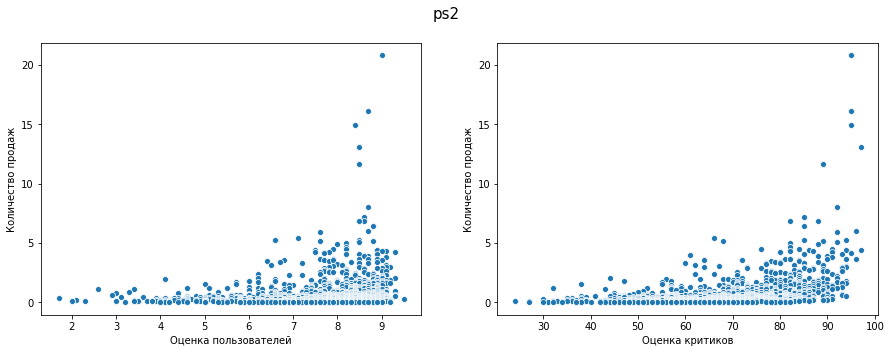

Корреляция между отзывами критиков и игровой платформой  PS2 : Умеренная 0.39543454945454876
Корреляция между отзывами пользователей и продажами  PS2 : Слабая 0.17286551112058213




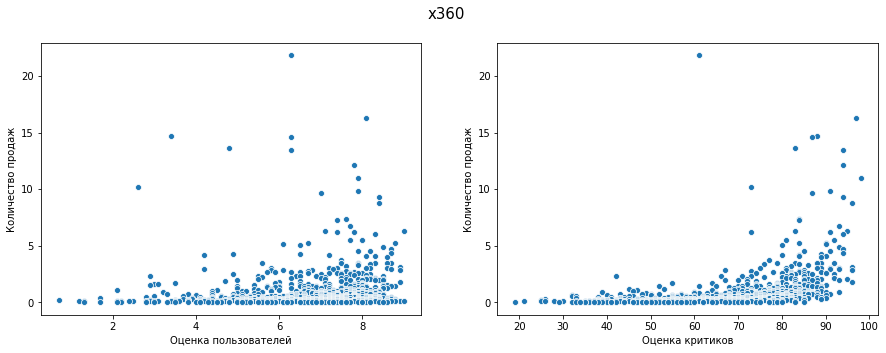

Корреляция между отзывами критиков и игровой платформой  X360 : Умеренная 0.3937358653072588
Корреляция между отзывами пользователей и продажами  X360 : Слабая 0.11445882978454185




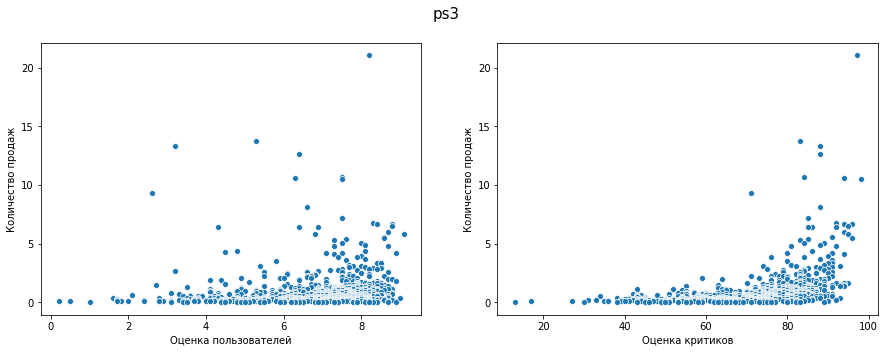

Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.4324315685642061
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.12669133936341712




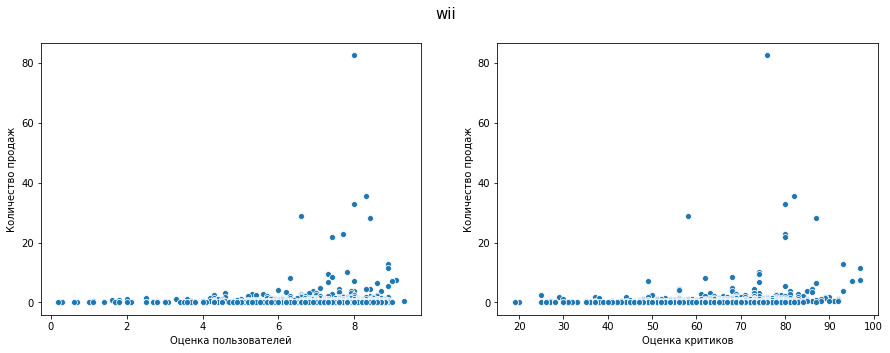

Корреляция между отзывами критиков и игровой платформой  WII : Слабая 0.17755988806089948
Корреляция между отзывами пользователей и продажами  WII : Слабая 0.11241436067003169




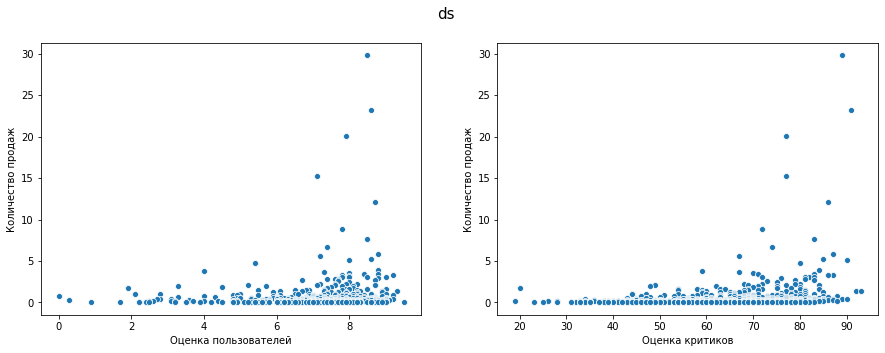

Корреляция между отзывами критиков и игровой платформой  DS : Слабая 0.23637945738859747
Корреляция между отзывами пользователей и продажами  DS : Слабая 0.1304355011164249




In [40]:
for platform in list_of_top5:
    other_platform_matrix(platform)

Произведем расчет дисперсии, стандартного отклонения, среднего и медианы у ТОП-5 платформ к оценкам пользователей:

In [41]:
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(data_games[data_games['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(data_games[data_games['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  data_games[data_games['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  data_games[data_games['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS2 : 1.7128899713716355
Стандартное отклонение PS2 : 1.3087742247506386
Среднее PS2 : 7.626833199033038
Медиана PS2 : 8.0


Дисперсия X360 : 2.0752880868793646
Стандартное отклонение X360 : 1.4405860220338682
Среднее X360 : 6.683540372670807
Медиана X360 : 7.0


Дисперсия PS3 : 2.1327377071986624
Стандартное отклонение PS3 : 1.460389573777717
Среднее PS3 : 6.726567844925884
Медиана PS3 : 7.1


Дисперсия WII : 3.019767825255102
Стандартное отклонение WII : 1.7377479176379702
Среднее WII : 6.742678571428572
Медиана WII : 7.15


Дисперсия DS : 2.27045054383751
Стандартное отклонение DS : 1.5068014281375997
Среднее DS : 7.025193798449613
Медиана DS : 7.4




Произведем расчет дисперсии, стандартного отклонения, среднего и медианы у ТОП-5 платформ к оценкам критиков:

In [42]:
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(data_games[data_games['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(data_games[data_games['platform']==platform]['critic_score']))
    print('Среднее',platform.upper(),':',  data_games[data_games['platform']==platform]['critic_score'].mean())
    print('Медиана',platform.upper(),':',  data_games[data_games['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия PS2 : 170.82854741560442
Стандартное отклонение PS2 : 13.070139533134466
Среднее PS2 : 68.72727272727273
Медиана PS2 : 70.0


Дисперсия X360 : 225.25163874640072
Стандартное отклонение X360 : 15.008385614262473
Среднее X360 : 68.61681222707423
Медиана X360 : 71.0


Дисперсия PS3 : 196.96800118976796
Стандартное отклонение PS3 : 14.034528890909305
Среднее PS3 : 70.3829268292683
Медиана PS3 : 73.0


Дисперсия WII : 220.95190590985464
Стандартное отклонение WII : 14.86445108000476
Среднее WII : 62.82393162393162
Медиана WII : 65.0


Дисперсия DS : 184.03656565302896
Стандартное отклонение DS : 13.566007727147621
Среднее DS : 63.76150627615063
Медиана DS : 66.0




 - Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам; 
 - Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей

### Общее распределение игр по жанрам.

Выведем жанры и их продажи с отсортировкой по убыванию:

In [43]:
 distr_genre = data_games.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,action,1744.17
1,sports,1331.27
2,shooter,1052.45
3,role-playing,934.56
4,platform,827.77
5,misc,802.51
6,racing,728.67
7,fighting,447.53
8,simulation,389.97
9,puzzle,242.57


Наглядно посмотрим, какие жанры лидируют, а какие нет:

Text(0, 0.5, 'Продажи')

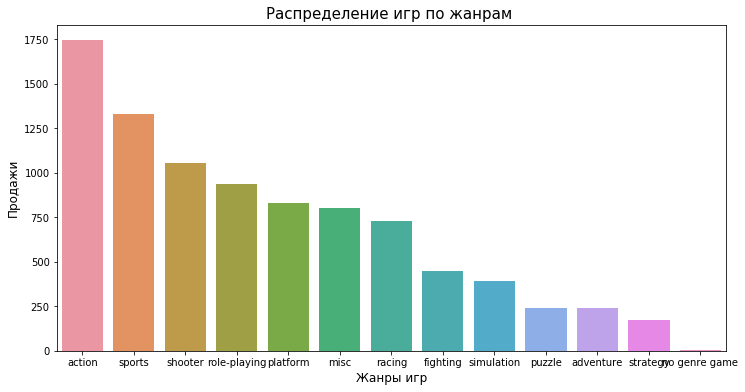

In [44]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

 - Лучше всего продаются жанры Action;
 - Стратегии на последнем месте по продажам 

### Вывод:
  
- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года.  С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.

- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation;

- Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки;

- Больше всего продаются игры на Sony Playstation и Xbox 360;
  
- У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит, что для людей мнение критиков важнее мнения других пользователей.


## Портрет пользователя каждого региона

Создадим функции для отображения сводных таблиц и барплотов:

In [45]:
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = data_games.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        
plt.show()
sns.set()

Сделаем функцию для отображения сводных таблиц за последних год:

In [46]:
def for_pivot_2016(row, title):
    temp = data_games[data_games['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        


### Портрет пользователя North America 

Выведем ТОП-5 платформ, жанров и рейтингов за весь период:

  platform  na_sales
0     x360    602.47
1      ps2    583.84
2      wii    496.90
3      ps3    393.49
4       ds    382.40



      genre  na_sales
0    action    879.01
1    sports    684.43
2   shooter    592.24
3  platform    445.50
4      misc    407.27



          rating  na_sales
0              e   1292.99
1  out of rating   1242.46
2              t    759.75
3              m    748.48
4           e10+    353.32





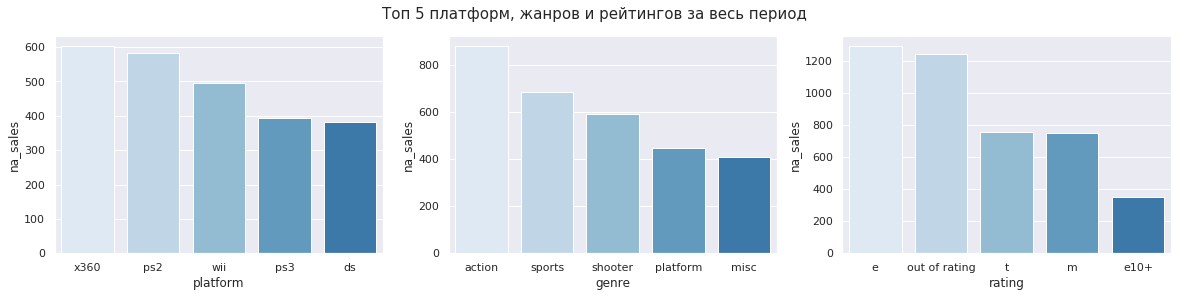

In [47]:
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

Выведем ТОП-5 платформ, жанров и рейтингов за последний год:

  platform  na_sales
0      ps4     21.49
1     xone     14.27
2      3ds      4.14
3     wiiu      2.10
4       pc      1.36



          genre  na_sales
0       shooter     16.24
1        action      9.29
2        sports      7.54
3  role-playing      5.89
4      fighting      1.84



          rating  na_sales
0              m     15.67
1              t      8.95
2  out of rating      8.53
3              e      7.97
4           e10+      3.81





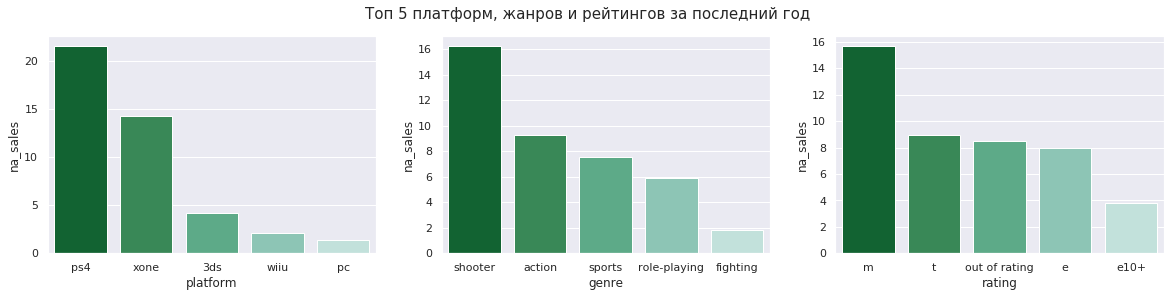

In [48]:
for_pivot_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

- Самые популярные игровые платформы в северной америке за все время это: XBOX, PS2, WII, PS3, DS;
- Топ 5 жанров в Cеверной Fмерике за все время: action, sports, shooter, platform, misc;
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

  Если посмотреть с 2015 по 2016 года, то мы видим как интерес кардинально меняется:
- Топ игровых приставок выглядит таким образом : PS4, Xone, DS3;
- Топ жанров игр: Shooter, Action, Sports;
- Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"

### Портрет пользователя European Union

Выведем ТОП-5 платформ, жанров и рейтингов за весь период для Европейского союза:

  platform  eu_sales
0      ps2    339.29
1      ps3    330.29
2     x360    270.76
3      wii    262.21
4       ps    213.61



     genre  eu_sales
0   action    519.13
1   sports    376.79
2  shooter    317.34
3   racing    236.51
4     misc    212.74



          rating  eu_sales
0              e    710.25
1  out of rating    613.83
2              m    483.97
3              t    427.03
4           e10+    188.52





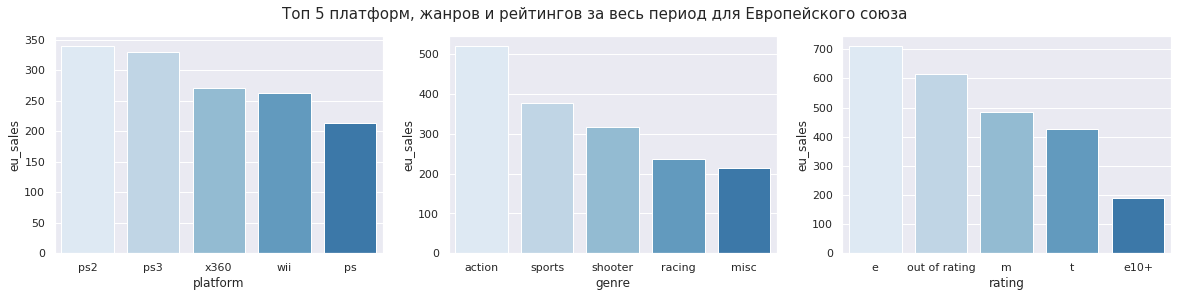

In [49]:
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

Выведем ТОП-5 платформ, жанров и рейтингов за последний год для Европейского союза:

  platform  eu_sales
0      ps4     31.78
1     xone      9.63
2       pc      3.53
3      3ds      2.33
4     wiiu      1.48



          genre  eu_sales
0       shooter     15.90
1        sports     12.01
2        action     10.68
3  role-playing      4.28
4        racing      1.77



          rating  eu_sales
0              m     16.54
1              e     13.61
2              t      9.79
3  out of rating      7.47
4           e10+      3.81





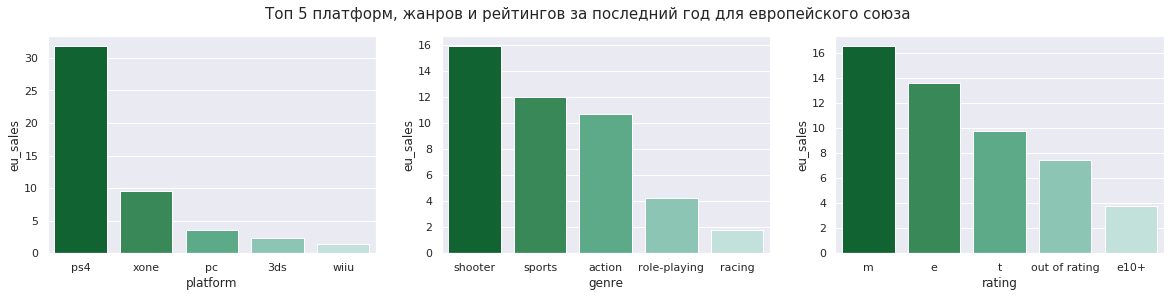

In [50]:
for_pivot_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год для европейского союза')

- Самые популярные игровые платформы в Европе это: PS2, PS3, X360, WII, PS;
- Топ 5 жанров в Европе : action, sports, shooter, racing, misc;
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

  За последний год интерес у пользователя кардинально изменился:
- Топ жанров стал: shooter, sports, action;
- Топ платформ: PS4, Xone, PC;
- Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

### Портрет пользователя Japanese 

Выведем ТОП-5 платформ, жанров и рейтингов за весь период для Японии:

  platform  jp_sales
0       ds    175.57
1       ps    139.82
2      ps2    139.20
3     snes    116.55
4      3ds    100.67



          genre  jp_sales
0  role-playing    355.41
1        action    161.43
2        sports    135.54
3      platform    130.83
4          misc    108.11



          rating  jp_sales
0  out of rating    841.96
1              e    198.11
2              t    151.40
3              m     64.24
4           e10+     40.20





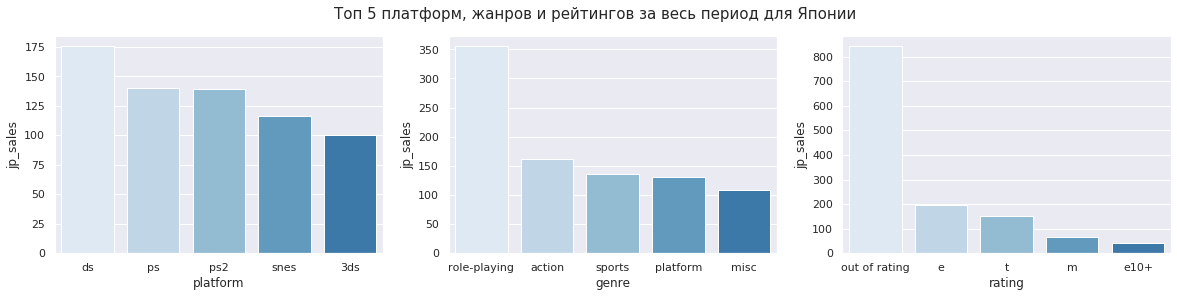

In [51]:
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

Выведем ТОП-5 платформ, жанров и рейтингов за последний год для Японии:

  platform  jp_sales
0      3ds      8.03
1      ps4      5.74
2      psv      3.56
3      ps3      1.30
4     wiiu      0.67



          genre  jp_sales
0        action      7.07
1  role-playing      6.61
2     adventure      1.18
3       shooter      1.06
4          misc      1.04



          rating  jp_sales
0  out of rating     14.32
1              t      2.27
2              m      1.20
3              e      1.07
4           e10+      0.45





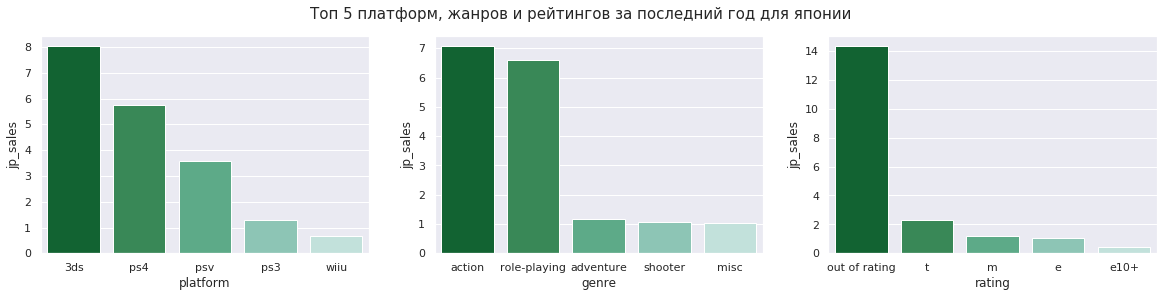

In [52]:
for_pivot_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за последний год для японии')

- Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS;
- Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc;
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

  За последний год интерес у пользователя кардинально изменился:
- Топ Жанров: action, role-playing, adventure;
- топ платформ: 3ds, ps4, psv;
- топ рейтингов: "от 13 и выше", "от 17 и выше" и "для всех

### Вывод:

Самые популярные игровые платформы в северной америке это: XBOX, PS2, WII, PS3, DS
Топ 5 жанров в северной америке : action, sports, shooter, platform, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS
Топ 5 жанров в Европе : action, sports, shooter, racing, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS
Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше" 
    
<b>Если брать данные за последний год</b>:<br>
То в Северной Америке:<br>
    <li>топ игровых платформ выглядит так: PS4, Xone, DS3</li>
    <li>Топ Жанров игр: Shooter, Action, Sports</li>
    <li>Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех"</li><br>
<br>
В Европейском союзе:<br>
    <li>Топ игровых платформ : PS4, Xone, PC</li>
    <li>Топ жанров: Shooter, Sports, Action</li>
    <li>Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"</li>
<br><br>
В Японии:<br>
    <li>Топ игровых платформ : 3DS, PS4, PSV</li>
    <li>Топ жанров: Action, Role-playing, Adventure</li>
    <li>Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех"</li>  

Для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с очень быстрыми темпами, и вкусы людей также могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше.


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет):

In [53]:
xone_hyp = data_games[(data_games['platform']=='xone') & (data_games['year_of_release']>2006)]['user_score']
pc_hyp = data_games[(data_games['platform']=='pc') & (data_games['year_of_release']>2006)]['user_score']


Посчитаем средний рейтинг пользователя для xbox платформ:

In [54]:
xone_hyp.mean()

6.521428571428572

Посчитаем средний рейтинг пользователя для PC платформ:

In [55]:
pc_hyp.mean()

6.765499124343257

Проведем проверку гипотезы с помощью метода ttest_ind:

In [56]:
alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.04401892858926169
Не получилось отвергнуть нулевую гипотезу


Не получилось опровергнуть нулевую гипотезу. То есть, с вероятностью в 4,4% можно получить различность рейтингов двух платформ.

### Средние пользовательские рейтинги жанров Action  и Sports  разные

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками:

In [57]:
genre_action_hyp = data_games[(data_games['genre']=='action') & (data_games['year_of_release']>2006)]['user_score']
genre_sports_hyp = data_games[(data_games['genre']=='sports') & (data_games['year_of_release']>2006)]['user_score']


Выведем среднюю оценку по жанру Action:

In [58]:
genre_action_hyp.mean()

6.836079077429983

Выведем среднюю оценку по жанру Sport:

In [59]:
genre_sports_hyp.mean()

6.307979626485569

Выполним проверку гипотезы. Будем использовать метод ttest_ind:

In [60]:
alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.540665510055229e-11
Отвергаем нулевую гипотезу


Получив p-value, мы отвергли нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам. 

### Вывод:

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть. 
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу. 


## Общий вывод

**В процессе работы мы провели:**

- Предобработку данных (изменили тип, регистр и названия);

- Выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. Когда начали разрабатываться мобильные игры и приложения, то пошел спад на консоли;

- За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS;

- Cредняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли;

- Cамый популярный жанр за все время это Action. На последнем месте стратегии;



**Cоставили портреты пользователей каждого региона**:
    
- Выяснили, что в Северной Америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше";

- В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр отличается лишь вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.
        
- В Японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке.
    
    
Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4.
Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.


